## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

### **Simulating the Normal Distribution**

In [20]:
norm_dist = stats.norm.rvs(loc=0,          # centre of distribution or mean of population
                           scale=1,        # standard deviation
                           size=100000,    # size of population
                           random_state=20
                          )

norm_dist = pd.Series(norm_dist)
norm_dist

0        0.883893
1        0.195865
2        0.357537
3       -2.343262
4       -1.084833
           ...   
99995    1.658810
99996    0.783421
99997   -0.359252
99998    1.836345
99999    0.865039
Length: 100000, dtype: float64

In [19]:
# get standard deviation
dist_std = norm_dist.std()
dist_std

1.003129611779469

In [33]:
# obtain the first and second standard deviations
one_std = norm_dist.mean() + dist_std
two_std = norm_dist.mean() + 2*dist_std
three_std = norm_dist.mean() + 3*dist_std

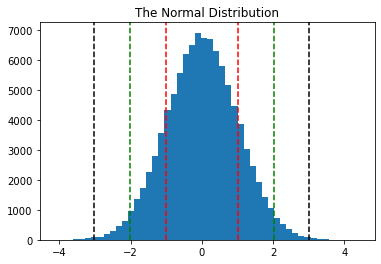

In [34]:
# plot the distribution
plt.hist(norm_dist, bins=50);

# plot standard deviations
plt.axvline(one_std, linestyle='--', color='red');
plt.axvline(-one_std, linestyle='--', color='red');
plt.axvline(two_std, linestyle='--', color='green');
plt.axvline(-two_std, linestyle='--', color='green');
plt.axvline(three_std, linestyle='--', color='black');
plt.axvline(-three_std, linestyle='--', color='black');

plt.title('The Normal Distribution')
plt.show();

In [35]:
# obtain area inside the first standard deviation.
len(norm_dist[(norm_dist < one_std) & (norm_dist > -one_std)])

68664

In [36]:
# obtain area inside the second standard deviation.
len(norm_dist[(norm_dist < two_std) & (norm_dist > -two_std)])

95497

In [37]:
# obtain area inside the third standard deviation.
len(norm_dist[(norm_dist < three_std) & (norm_dist > -three_std)])

99731

In [43]:
for num in range(1, 4):
    print(np.round(1 - stats.norm.cdf(-num)*2, 3))

0.683
0.954
0.997


### **Simulating the Central Limit Theorem**

In [38]:
#Import data
url = 'https://drive.google.com/file/d/1jomahr4JUPi8lAO33_RB1I-1089feWg2/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
popl = pd.read_csv(path)

In [39]:
popl.head()

,0
0,1.160131
1,0.222175
2,3.101406
3,0.758150
4,2.159439


In [141]:
float(popl.mean())

3.3871463523736334

In [40]:
popl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12500 non-null  float64
dtypes: float64(1)
memory usage: 97.8 KB


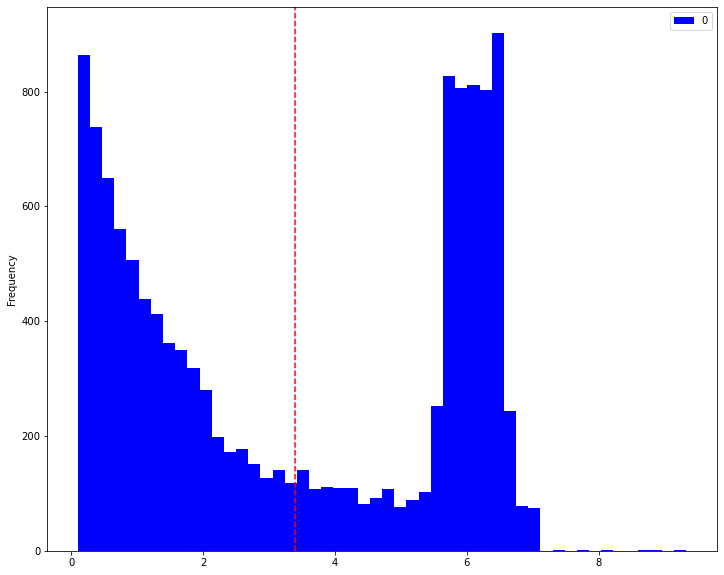

In [41]:
popl.plot.hist(bins=50, color='blue', figsize=(12, 10));
plt.axvline(float(popl.mean()), color='red', linestyle='--');

#### **Using a Sampling Distribution**

In [61]:
num_samples = 10000
sample_size = 100
samples = []
sample_mean = []


# draw sample distribution
for samp in range(num_samples):
    samples.append(np.array(popl.sample(n=sample_size, replace=True)['0']))

    
# calculate distribution means
for samp in samples:
    sample_mean.append(np.mean(samp))

In [95]:
# Comparing standard errors formulars
stand_error_popl = np.std(np.array(popl['0']))/np.sqrt(sample_size)

stand_error_sample = np.std(samples[0])/np.sqrt(sample_size)

sample_mean_std_dev = np.std(sample_mean)

print('standard error based on population:', stand_error_popl, '\n',\
      'standard error based on sample: ', stand_error_sample, '\n',\
      'standard deviation of sample_mean: ', sample_mean_std_dev)

standard error based on population: 0.24383710869547745 
 standard error based on sample:  0.2339525750752268 
 standard deviation of sample_mean:  0.244904545554111


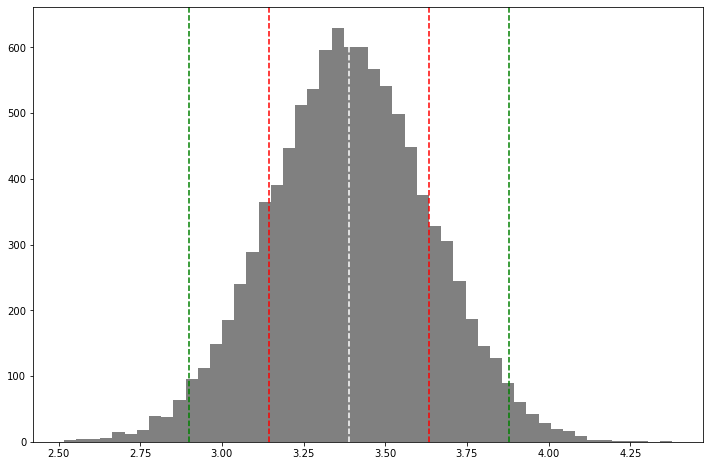

In [109]:
sample_mean_dist = pd.Series(sample_mean)
mean_sample_mean = float(np.mean(sample_mean))
std_error = float(np.std(sample_mean))

# plot the distribution and the standard errors
sample_mean_dist.hist(bins=50, grid=False, figsize=(12, 8), color='gray');
plt.axvline(mean_sample_mean, color='white', linestyle='--');
plt.axvline(mean_sample_mean + std_error, color='red', linestyle='--');
plt.axvline(mean_sample_mean - std_error, color='red', linestyle='--');
plt.axvline(mean_sample_mean + 2*std_error, color='green', linestyle='--');
plt.axvline(mean_sample_mean - 2*std_error, color='green', linestyle='--');

#### **Using Standard Distributions**

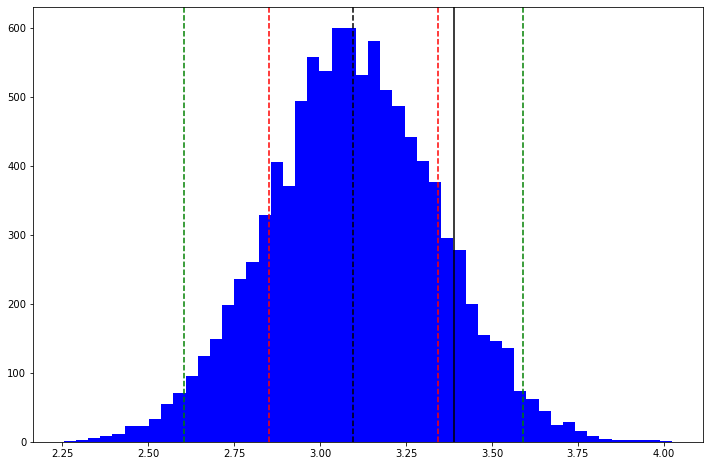

In [127]:
# pick sample
sample = popl.sample(n=100, random_state=25)

# generating a normal distribution
popl_norm_dist = stats.norm.rvs(loc=np.mean(sample['0']),       # sample mean
                                scale=stats.sem(sample),        # estimation of standard error
                                size=10000,
                                random_state=45
                               )

# plot distribution and the standard errors
popl_norm_dist = pd.Series(popl_norm_dist)
popl_norm_dist.hist(bins=50, grid=False, figsize=(12, 8), color='blue');
plt.axvline(np.mean(sample['0']), color='black', linestyle='--');
plt.axvline(mean_sample_mean, color='black', linestyle='-');
plt.axvline(np.mean(sample['0']) + stats.sem(sample), color='red', linestyle='--');
plt.axvline(np.mean(sample['0']) - stats.sem(sample), color='red', linestyle='--');
plt.axvline(np.mean(sample['0']) + 2*stats.sem(sample), color='green', linestyle='--');
plt.axvline(np.mean(sample['0']) - 2*stats.sem(sample), color='green', linestyle='--');

In [124]:
# calculate the confidence interval
stats.norm.interval(confidence=0.95,               # the confidence interval
                    loc=np.mean(sample['0']),      # sample mean
                    scale=stats.sem(sample)        # standard error
                   )

(array([2.61478712]), array([3.57918657]))

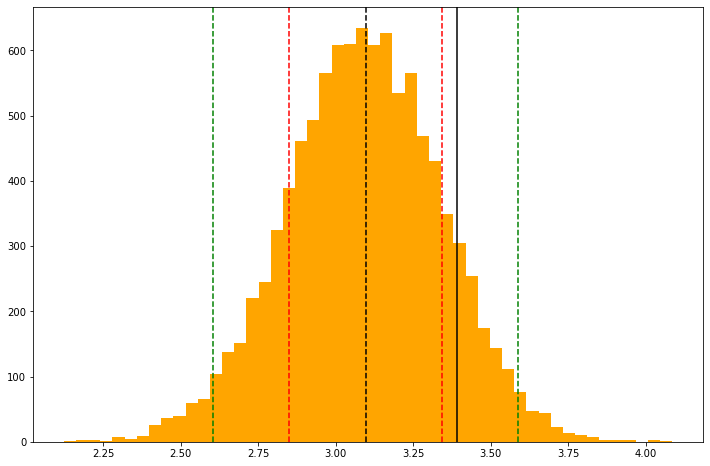

In [136]:
# generating a t distribution
popl_t_dist = stats.t.rvs(loc=np.mean(sample['0']),    # sample mean
                          scale=stats.sem(sample),     # estimation of standard error
                          df=len(sample),              # size of sample
                          size=10000,
                          random_state=45
                         )

# plot distribution and the standard errors
popl_t_dist = pd.Series(popl_t_dist)
popl_t_dist.hist(bins=50, grid=False, figsize=(12, 8), color='orange');
plt.axvline(np.mean(sample['0']), color='black', linestyle='--');
plt.axvline(mean_sample_mean, color='black', linestyle='-');
plt.axvline(np.mean(sample['0']) + stats.sem(sample), color='red', linestyle='--');
plt.axvline(np.mean(sample['0']) - stats.sem(sample), color='red', linestyle='--');
plt.axvline(np.mean(sample['0']) + 2*stats.sem(sample), color='green', linestyle='--');
plt.axvline(np.mean(sample['0']) - 2*stats.sem(sample), color='green', linestyle='--');

In [138]:
# calculate the confidence interval
stats.t.interval(confidence=0.95,               # the confidence interval
                 loc=np.mean(sample['0']),      # sample mean
                 scale=stats.sem(sample),       # standard error
                 df=len(sample)-1
                )

(array([2.60882029]), array([3.5851534]))

In [142]:
counter = 0

for i in range(10000):
    sample = popl.sample(n=100)
    confid_interval = stats.t.interval(confidence=0.95,               # the confidence interval
                                       loc=np.mean(sample['0']),      # sample mean
                                       scale=stats.sem(sample),       # standard error
                                       df=len(sample)-1
                                      )
    
    if (confid_interval[0][0] < float(popl.mean())) & (confid_interval[1][0] > float(popl.mean())):
        counter += 1

print("The true mean falls inside the confidence interval " + str(counter) + " times")

The true mean falls inside the confidence interval 9506 times
